In [1]:
import os
import csv
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw
from torchvision.datasets.vision import *
import torch
import copy

In [2]:
datasets0 = [
    'iris_verification_iitd_01_01',
    'iris_verification_inno_a1_01_03',
    'iris_verification_NDCSI2013_01_05'
]
datasets = [
    'train_iris_casia_v4',
    'train_iris_inno_a1',
    'train_iris_nd_0405',
    'train_iris_nd_crosssensor_2013',
    'train_iris_utris_v1'
]

root = os.path.join('..', '..', 'Datasets')

dataset_id = 3

dataset_dir = os.path.join(root, datasets[dataset_id])
annotations_path = os.path.join(dataset_dir, 'annotations.csv')
with open(annotations_path, newline='') as csvfile:
    annotations = csv.reader(csvfile, delimiter=',', quotechar='"')
    annotations_list = list(annotations)


In [3]:
dataset_dir

'../../Datasets/train_iris_nd_crosssensor_2013'

In [4]:
dataset_dir

'../../Datasets/train_iris_nd_crosssensor_2013'

In [5]:
from dataset import *

In [17]:
ds = IrisDataset([dataset_dir], mode="classification", image_set="val")

In [18]:
len(ds.picked_subjects)/len(ds.subjects)

0.14998823160207123

In [19]:
len(ds) == len(ds.picked_subjects)

True

0 nd1S05368_1
6 nd1S05306_1
13 nd1S05191_2
20 nd1S05477_1


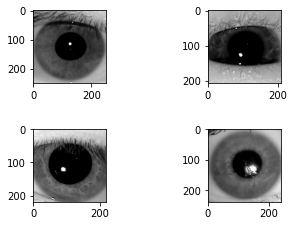

In [11]:
for i in range(4):
    ind = i*30
    img, target = ds[ind]
    ax1 = plt.subplot(2,4,(i*2+1))
    ax1.imshow(img, 'gray')
    if type(target) == int:
        print(target, ds.id_to_subject_dict[target])
    else:
        ax1 = plt.subplot(2,4,(i*2+2))
        ax1.imshow(target)


In [12]:
header = annotations_list[0]
params = annotations_list[2]

In [13]:
print( '\n'.join("{:<20}: {:<28}".format(*k) for k in zip(header, params) ) )

                    : 1                           
YOB                 : 1978                        
added_by            : dthomas4                    
by_user             : sbaker3                     
collectionid        : nd1C00013                   
confidence          : 0.9999563097953796          
contacts            : No                          
contacts_cosmetic   : No                          
contacts_texture    : No                          
contacts_toric      : No                          
date                : 2008-04-01 00:00:00         
date_added          : 2008-08-12 18:12:10         
db_id               : iris_nd_crosssensor_2013    
detection_info      : iface 3.9.0                 
environmentid       : nd1E00074                   
eye_color           : Brown                       
eye_side            : 1                           
fold                : 1                           
fstate              : ok                          
gender              : 2        

In [44]:
import pandas as pd

In [46]:
df = pd.read_csv( annotations_path)

In [66]:
df.groupby(['subject_id','eye_side']).count()

Unnamed: 0  YOB  added_by  by_user  collectionid  \
subject_id eye_side                                                     
nd1S02463  1                315  315       315      315           315   
           2                323  323       323      323           323   
nd1S04233  2                339  339       339      339           337   
nd1S04252  1                 36   36        36       36            36   
nd1S04261  2                215  215       215      215           215   
...                         ...  ...       ...      ...           ...   
nd1S06265  2                 39   39        39       39            39   
nd1S06266  2                 30   30        30       30            30   
nd1S06267  1                 29   29        29       29            29   
nd1S06269  1                 30   30        30       30            30   
           2                 30   30        30       30            30   

                     confidence  contacts  contacts_cosmetic  \
subject_id eye_side                                            
nd1S02463  1                315       315                315   
           2                323       323                323   
nd1S04233  2                339       339                339   
nd1S04252  1                 36        36                 36   
nd1S04261  2                215       215                215   
...                         ...       ...                ...   
nd1S06265  2                 39        39                 39   
nd1S06266  2                 30        30                 30   
nd1S06267  1                 29        29                 29   
nd1S06269  1                 30        30                 30   
           2                 30        30                 30   

                     contacts_texture  contacts_toric  ...  radius_1  rank  \
subject_id eye_side                                    ...                   
nd1S02463  1                      315             315  ...       315   195   
           2                      323             323  ...       323   206   
nd1S04233  2                      339             339  ...       339   219   
nd1S04252  1                       36              36  ...        36    36   
nd1S04261  2                      215             215  ...       215   125   
...                               ...             ...  ...       ...   ...   
nd1S06265  2                       39              39  ...        39     0   
nd1S06266  2                       30              30  ...        30     0   
nd1S06267  1                       29              29  ...        29     0   
nd1S06269  1                       30              30  ...        30     0   
           2                       30              30  ...        30     0   

                     sensor_name  sensorid  shot  stageid  state  treatment  \
subject_id eye_side                                                           
nd1S02463  1                 315       315   180      315    315        195   
           2                 323       323   191      323    323        206   
nd1S04233  2                 339       339   219      339    339        219   
nd1S04252  1                  36        36    36       36     36         36   
nd1S04261  2                 215       215   125      215    215        125   
...                          ...       ...   ...      ...    ...        ...   
nd1S06265  2                  39        39     0       39     39          0   
nd1S06266  2                  30        30     0       30     30          0   
nd1S06267  1                  29        29     0       29     29          0   
nd1S06269  1                  30        30     0       30     30          0   
           2                  30        30     0       30     30          0   

                     validity  weather  
subject_id eye_side                     
nd1S02463  1              315      315  
           2              323      323  
nd1S04233  2              339  

In [68]:
df[df['subject_id'] == 'nd1S02463']

,Unnamed: 0,YOB,added_by,by_user,collectionid,confidence,contacts,contacts_cosmetic,contacts_texture,contacts_toric,...,rank,sensor_name,sensorid,shot,stageid,state,subject_id,treatment,validity,weather
308,393,1956,dthomas4,flynn,nd1C00013,0.999991,No,No,No,No,...,0.0,LG2200,nd1N00006,1.0,nd1T00014,ok,nd1S02463,No,1,Inside
309,394,1956,dthomas4,flynn,nd1C00013,0.999996,No,No,No,No,...,0.0,LG2200,nd1N00006,1.0,nd1T00014,ok,nd1S02463,No,1,Inside
310,395,1956,dthomas4,flynn,nd1C00013,0.999993,No,No,No,No,...,0.0,LG2200,nd1N00006,1.0,nd1T00014,ok,nd1S02463,No,1,Inside
311,396,1956,dthomas4,flynn,nd1C00013,0.999974,No,No,No,No,...,0.0,LG2200,nd1N00006,2.0,nd1T00014,ok,nd1S02463,No,1,Inside
312,397,1956,dthomas4,flynn,nd1C00013,0.999991,No,No,No,No,...,0.0,LG2200,nd1N00006,2.0,nd1T00014,ok,nd1S02463,No,1,Inside
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101013,145601,1956,chelm,dwright2,nd1C00042,0.999978,No,No,No,No,...,NaN,LG4000,nd1N00020,NaN,nd1T00016,ok,nd1S02463,NaN,1,Inside
101014,145602,1956,chelm,dwright2,nd1C00042,0.999922,No,No,No,No,...,NaN,LG4000,nd1N00020,NaN,nd1T00016,ok,nd1S02463,NaN,1,Inside
101015,145603,1956,chelm,dwright2,nd1C00042,0.999981,No,No,No,No,...,NaN,LG4000,nd1N00020,NaN,nd1T00016,ok,nd1S02463,NaN,1,Inside
101016,145604,1956,chelm,dwright2,nd1C00042,0.999952,No,No,No,No,...,NaN,LG4000,nd1N00020,NaN,nd1T00016,ok,nd1S02463,NaN,1,Inside


In [76]:
df['validity'].max()

1